Part 1: Pre-Processing our Dataset

In [16]:
#Importing important libraries to preprocess the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Loading Dataset
df = pd.read_csv("Dataset.csv")

In [18]:
#Printing the Schema of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MedInc        4876 non-null   float64
 1   HouseAge      4876 non-null   float64
 2   AveRooms      5000 non-null   float64
 3   AveBedrms     5000 non-null   float64
 4   Population    5000 non-null   float64
 5   AveOccup      5000 non-null   float64
 6   Latitude      5000 non-null   float64
 7   Longitude     5000 non-null   float64
 8   target        5000 non-null   float64
 9   region        4877 non-null   object 
 10  availability  5000 non-null   object 
dtypes: float64(9), object(2)
memory usage: 429.8+ KB


In [19]:
#Printing first 20 rows in the dataset
df.head(20)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,region,availability
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,West,For Rent
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,East,For Sale
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,North,For Rent
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,South,For Sale
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,East,For Rent
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,South,For Rent
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,South,For Sale
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414,South,For Rent
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,South,For Rent
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611,North,For Sale


In [20]:
#Showing Null Values In Each Column
print("Number of Each NULL Values in each Column is:")
nullCols = df.isnull().sum()

nullCols

Number of Each NULL Values in each Column is:


MedInc          124
HouseAge        124
AveRooms          0
AveBedrms         0
Population        0
AveOccup          0
Latitude          0
Longitude         0
target            0
region          123
availability      0
dtype: int64

In [21]:
#Filling null values in each column
houseAgeMean = df['HouseAge'].mean(axis=0)
medIncMedian = df['MedInc'].median(axis=0)
regionMode = df['region'].mode()[0]
#One-Hot Encoding the 'availability' categorical column
availabilityOneHotEncoded = pd.get_dummies(df['availability'],dtype=int)


#Creating a new, pre-processed dataframe with the non-null columns and the region column Numerically encoded, dropping the availability column
processedDF = df\
.fillna({'HouseAge':houseAgeMean,'MedInc':medIncMedian,'region':regionMode,})\
.replace({'region':{'North':0,'South':1,'East':2,'West':3}})\
.drop('availability',axis=1)
#Concatenating the processed data frame with the one-hot encoded dataframe
finalDF = pd.concat([processedDF,availabilityOneHotEncoded],axis=1)


In [22]:
#Null Values Count of the new, processed DataFrame
nC = finalDF.isnull().sum()
nC

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
region        0
For Rent      0
For Sale      0
dtype: int64

In [23]:
#Displaying first 10 rows
finalDF.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,region,For Rent,For Sale
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,3,1,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2,0,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0,1,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1,0,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2,1,0
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,1,1,0
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,1,0,1
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414,1,1,0
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,1,1,0
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611,0,0,1


Part 2: Preparing our Dataset for our Regression Model

In [24]:
#Importing the Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [25]:
#Splitting our dataset
X = finalDF.drop(columns='target',axis=1)
y = finalDF['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Scaling our dataset
scaler = StandardScaler(copy=True,with_mean=True,with_std=True)
#Fitting and transforming our data
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)


Part 3: Creating our Linear Regression Model

In [27]:
#Fitting and training our Model
regModel = LinearRegression()
regModel.fit(X_trainScaled,y_train)
trainScore = regModel.score(X_trainScaled, y_train)
testScore = regModel.score(X_testScaled, y_test)
print(f"Score for training set: {trainScore}\nScore for testing set: {testScore}")

Score for training set: 0.5819053103788039
Score for testing set: 0.5741127190563313


In [28]:
#Predicting the scores
pred = regModel.predict(X_testScaled)


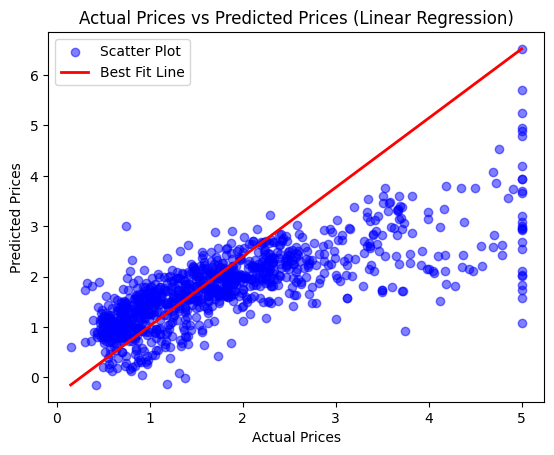

In [29]:
# Scatter plot of actual vs predicted prices
plt.scatter(y_test, pred, color='blue', alpha=0.5, label='Scatter Plot')
plt.plot([min(y_test), max(y_test)], [min(pred), max(pred)], color='red', linewidth=2, label='Best Fit Line')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Linear Regression)")
plt.legend()
plt.show()

In [30]:
#Calculating MAE Value
rSquared = r2_score(y_test,pred)
MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
print(f"RSquared Score is: {rSquared}\nMAE Score is: {MAE}\nRMSE Score is: {RMSE}")

RSquared Score is: 0.5741127190563313
MAE Score is: 0.5042206672525139
RMSE Score is: 0.7100482378798114
